**Installing the required libraries**

In [18]:
!pip install seedir
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.3 MB/s eta 0:00:00


**Importing the required libraries**

In [129]:
import tarfile
import seedir as sd
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
from IPython.display import Audio
import librosa
from tqdm import tqdm

**Extracting all the files from the tar file**

In [17]:
with tarfile.open('/content/drive/MyDrive/Speech_recognition/tensorflow-speech-commands.tar.gz', 'r') as tar:
  tar.extractall()

In [29]:
# Tree diagram of the directory
sd.seedir('/content/TensorFlow-Speech-Commands', style='emoji',depthlimit=1,
          regex=True,
          exclude_files=['LICENSE','README.md','.*\.txt$'],
          beyond='content')

📁 TensorFlow-Speech-Commands/
├─📁 house/
│ └─📄 0 folder(s), 1750 file(s)
├─📁 six/
│ └─📄 0 folder(s), 2369 file(s)
├─📁 on/
│ └─📄 0 folder(s), 2367 file(s)
├─📁 eight/
│ └─📄 0 folder(s), 2352 file(s)
├─📁 two/
│ └─📄 0 folder(s), 2373 file(s)
├─📁 cat/
│ └─📄 0 folder(s), 1733 file(s)
├─📁 tree/
│ └─📄 0 folder(s), 1733 file(s)
├─📁 wow/
│ └─📄 0 folder(s), 1745 file(s)
├─📁 _background_noise_/
│ └─📄 0 folder(s), 6 file(s)
├─📁 one/
│ └─📄 0 folder(s), 2370 file(s)
├─📁 happy/
│ └─📄 0 folder(s), 1742 file(s)
├─📁 stop/
│ └─📄 0 folder(s), 2380 file(s)
├─📁 down/
│ └─📄 0 folder(s), 2359 file(s)
├─📁 dog/
│ └─📄 0 folder(s), 1746 file(s)
├─📁 marvin/
│ └─📄 0 folder(s), 1746 file(s)
├─📁 nine/
│ └─📄 0 folder(s), 2364 file(s)
├─📁 right/
│ └─📄 0 folder(s), 2367 file(s)
├─📁 up/
│ └─📄 0 folder(s), 2375 file(s)
├─📁 bed/
│ └─📄 0 folder(s), 1713 file(s)
├─📁 no/
│ └─📄 0 folder(s), 2375 file(s)
├─📁 seven/
│ └─📄 0 folder(s), 2377 file(s)
├─📁 left/
│ └─📄 0 folder(s), 2353 file(s)
├─📁 four/
│ └─📄 0 folder(s), 2372 file(s)

This tree diagram gives the pictorial representation of all the labels in the dataset and the corresponding number of files for each label.

In [44]:
audio_path = []
labels     = []
for root, dirs, files in os.walk('/content/TensorFlow-Speech-Commands'):
  for file in sorted(files):
    file_path = os.path.join(root, file)
    if 'wav' in file_path:
      audio_path.append(file_path)
      labels.append(file_path.split('/')[-2])

In [90]:
data = pd.DataFrame(list(zip(audio_path,labels)),columns=['audio_path','label'])
data.head()

,audio_path,label
0,/content/TensorFlow-Speech-Commands/house/00b0...,house
1,/content/TensorFlow-Speech-Commands/house/00b0...,house
2,/content/TensorFlow-Speech-Commands/house/00b0...,house
3,/content/TensorFlow-Speech-Commands/house/0132...,house
4,/content/TensorFlow-Speech-Commands/house/0135...,house


In [91]:
data.shape

(64727, 2)

There are 64727 files in the dataset

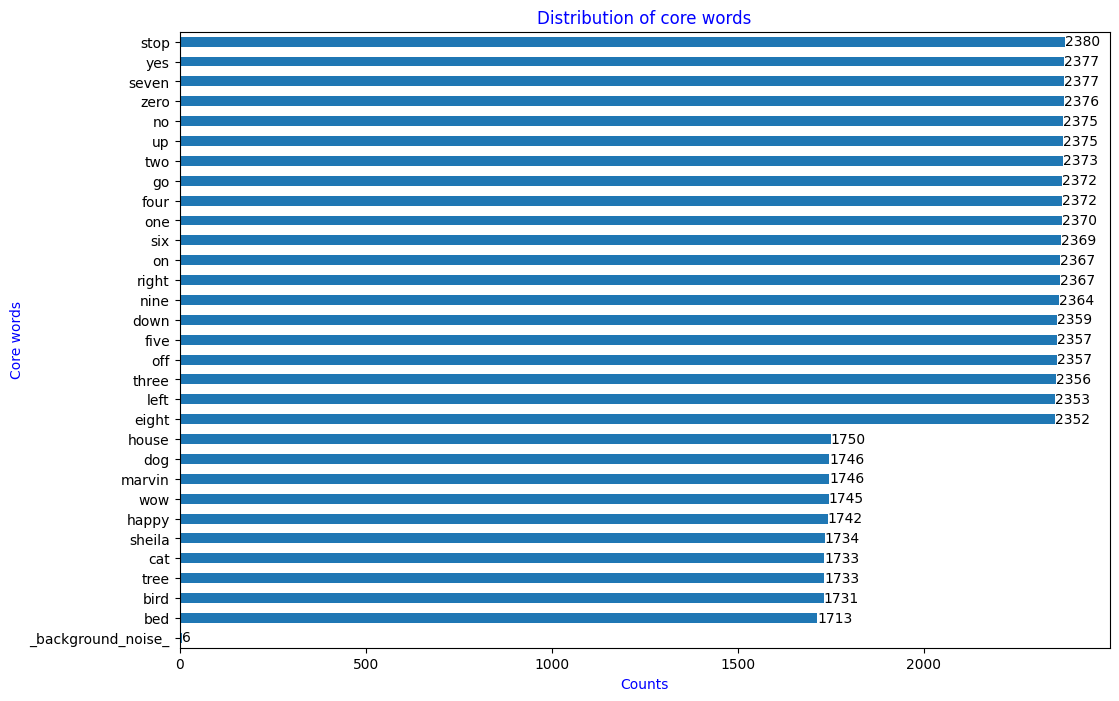

In [92]:
plt.figure(figsize=(12,8))
ax = data.label.value_counts().sort_values().plot(kind = 'barh')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Counts',color='blue')
plt.ylabel('Core words',color='blue')
plt.title('Distribution of core words',color='blue')
plt.show()

**Key findings:**<br>
- It can be observed that the number of audio files for the 'background noise' is as low as 6 files whereas the core word 'stop'  has 2380 audio files which is the highest among the dataset.


In [100]:
# This function takes audio path as input and plots
# Spectrum of an audio file

def plotting_spectrum(audio_path):
  # Reading the wave file
  sample_rate, sample_data = wavfile.read(audio_path)

  # Grabbing the first 10 seconds of audio
  clip_length = 10  # in seconds
  num_samples = int(clip_length * sample_rate)
  sample_data = sample_data[:num_samples]

  # Plotting spectrum of audio file
  n = len(sample_data)
  frequencies = np.fft.rfftfreq(n, d=1/sample_rate)
  spectrum = np.fft.rfft(sample_data)
  plt.plot(frequencies, np.abs(spectrum))
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Amplitude')
  plt.title('Spectrum of Audio File')
  plt.show()

  # Playing the audio file
  audio = Audio(sample_data, rate=sample_rate)
  return audio

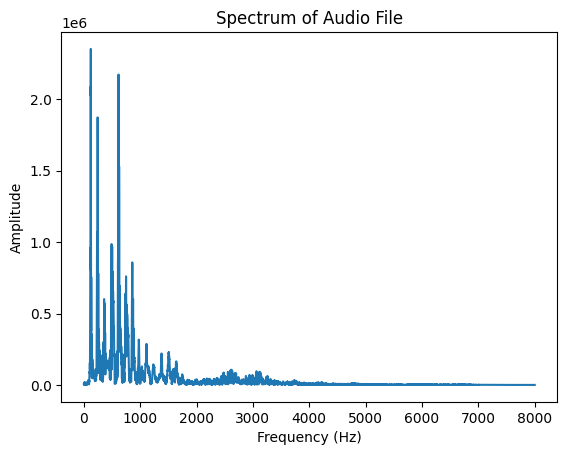

In [120]:
sample_1_file  = data[data['label']=='one']['audio_path'].tolist()[0]
sample_1_audio = plotting_spectrum(sample_1_file)
sample_1_audio

This audio file sounds one

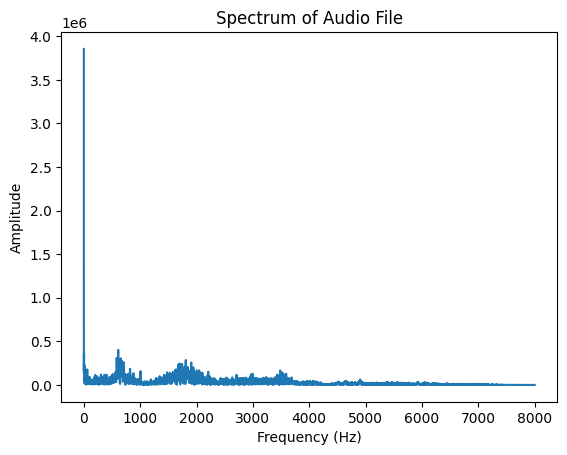

In [121]:
sample_2_file  = data[data['label']=='happy']['audio_path'].tolist()[0]
sample_2_audio = plotting_spectrum(sample_2_file)
sample_2_audio

This audio file sounds happy

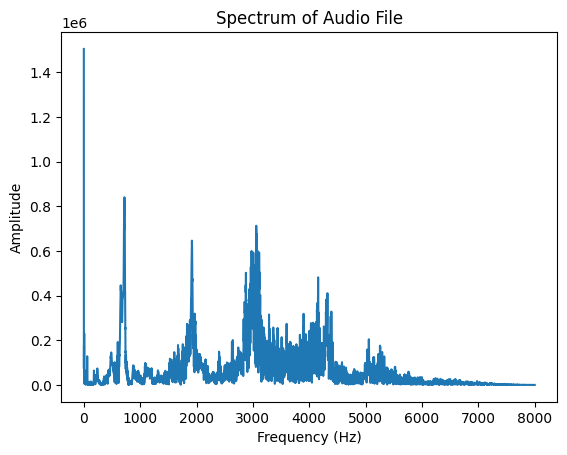

In [122]:
sample_3_file  = data[data['label']=='seven']['audio_path'].tolist()[0]
sample_3_audio = plotting_spectrum(sample_3_file)
sample_3_audio

This audio file sounds seven

In [134]:
# Getting durations of all audio files
durations = []
for i in tqdm(data['audio_path'].tolist()):
    duration = librosa.get_duration(path=i)
    durations.append(duration)

100%|██████████| 64727/64727 [00:20<00:00, 3229.04it/s]


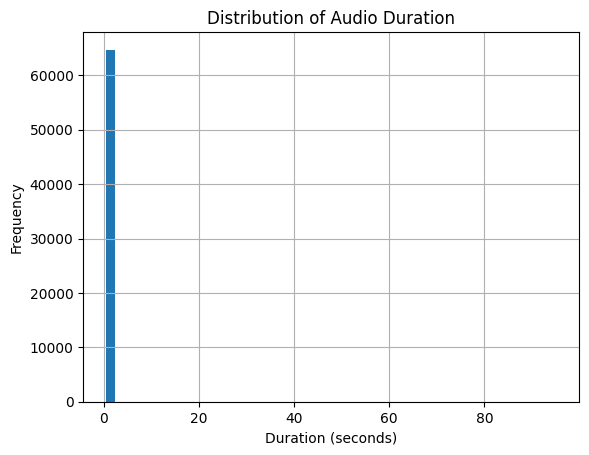

In [135]:
# Plot histogram of audio file durations
plt.hist(durations, bins=50)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Duration')
plt.grid('--')
plt.show()

It can be observed that the duration of all the audio files is 1 second